# **Modelling and Evaluation V4**

## Objectives

* Answer business requirement 1:
    * The client aims to visually differentiate lesions. The model should be capable of reaching an accuracy of at least 70%.
<br><br>

* Answer business requirement 2:
    - The model should provide a confidence level for each prediction.
<br><br>

* Answer business requirement 3:
    - If a skin lesion is predicted as malignant with high confidence, the system should recommend immediate medical consultation.
<br><br>

* Answer business requirement 5:
    - The AI model's insights should assist healthcare professionals in making informed decisions about the treatment process.
<br><br>

* Answer business requirement 6:
    - The model's performance will be evaluated using balanced performance metrics such as F1 Score.
<br><br>
## Inputs

* inputs/skin_cancer_dataset/sorted_images/train
* inputs/skin_cancer_dataset/sorted_images/test
* inputs/skin_cancer_dataset/sorted_images/validation
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on the random image file.

## Additional Comments

* V4 - Using OpenCV to load the images and resize them smaller. Use SMOTE to fix the imbalance
<br><br>

---

---

# Import regular packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import joblib

2023-06-18 22:27:37.219147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

# Change working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis'

---

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/skin_cancer_dataset/sorted_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [6]:
version = 'modelling_evaluation_v4'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set label names

In [7]:
# Set the labels
train_labels = os.listdir(train_path)
print('Label for train set the images are', train_labels, 'there are', len(train_labels) )
test_labels = os.listdir(test_path)
print('Label for test set the images are', test_labels, 'there are', len(test_labels) )
val_labels = os.listdir(val_path)
print('Label for val set the images are', val_labels, 'there are', len(val_labels) )

Label for train set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for test set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7
Label for val set the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel'] there are 7


## Set image shape

In [8]:
image_shape = (-1,28,28,3)
image_shape

(-1, 28, 28, 3)

In [9]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/modelling_evaluation_v4/image_shape.pkl']

In [10]:
## Import saved image shape embedding
import joblib
image_shape = joblib.load(filename=f"{file_path}/image_shape.pkl")
image_shape

(-1, 28, 28, 3)

---

## Build training, validation and test set

In [21]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


def load_images_from_directory(directory_path):
    # Get the list of all classes (subdirectories)
    classes = os.listdir(directory_path)
    
    # Initialize the list that will contain all images
    X = []
    
    # Initialize the list that will contain all labels
    y = []
    
    # For each class (subdirectory)
    for class_name in classes:
        # Get the list of all images in this subdirectory
        images = os.listdir(os.path.join(directory_path, class_name))
        
        # For each image
        for image_name in images:
            # Construct the full path to the image
            image_path = os.path.join(directory_path, class_name, image_name)
            
            # Read the image and resize it to 28x28
            image = cv2.imread(image_path)
            image = cv2.resize(image, (28, 28))

            # Convert from BGR to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Add this image to the list of all images
            X.append(image)
            
            # Add the label (class name) of this image to the list of all labels
            y.append(class_name)
    
    # Convert the list of images into a numpy array
    X = np.array(X)
    
    # Convert the labels into integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    return X, y_encoded, label_encoder.classes_, label_encoder


# Load the datasets
X_train, y_train, train_classes, train_label_encoder = load_images_from_directory(train_path)
X_test, y_test, test_classes, test_label_encoder = load_images_from_directory(test_path)
X_val, y_val, val_classes, val_label_encoder = load_images_from_directory(val_path)

In [22]:
def print_encoded_labels(label_encoder):
    # Print the class names for each label
    for idx, class_name in enumerate(label_encoder.classes_):
        print(f"Encoded Label {idx} corresponds to class {class_name}")

In [23]:
# Print the encoded labels for the training set
print("Training Set:")
print_encoded_labels(train_label_encoder)

# Print the encoded labels for the test set
print("Test Set:")
print_encoded_labels(test_label_encoder)

# Print the encoded labels for the validation set
print("Validation Set:")
print_encoded_labels(val_label_encoder)

Training Set:
Encoded Label 0 corresponds to class akiec
Encoded Label 1 corresponds to class bcc
Encoded Label 2 corresponds to class bkl
Encoded Label 3 corresponds to class df
Encoded Label 4 corresponds to class mel
Encoded Label 5 corresponds to class nv
Encoded Label 6 corresponds to class vasc
Test Set:
Encoded Label 0 corresponds to class akiec
Encoded Label 1 corresponds to class bcc
Encoded Label 2 corresponds to class bkl
Encoded Label 3 corresponds to class df
Encoded Label 4 corresponds to class mel
Encoded Label 5 corresponds to class nv
Encoded Label 6 corresponds to class vasc
Validation Set:
Encoded Label 0 corresponds to class akiec
Encoded Label 1 corresponds to class bcc
Encoded Label 2 corresponds to class bkl
Encoded Label 3 corresponds to class df
Encoded Label 4 corresponds to class mel
Encoded Label 5 corresponds to class nv
Encoded Label 6 corresponds to class vasc


## SMOTE

In [24]:
import pandas as pd

def create_dataframe(X_train, y_train_encoded):
    # Reshape the data and create a DataFrame
    data = X_train.reshape(X_train.shape[0], -1)
    data = pd.DataFrame(data)
    data['label'] = y_train_encoded
    return data

In [25]:
Train_data = create_dataframe(X_train, y_train)
Label_train = Train_data["label"]
Data_train = Train_data.drop(columns=["label"]) 

/Users/danielhamilton/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

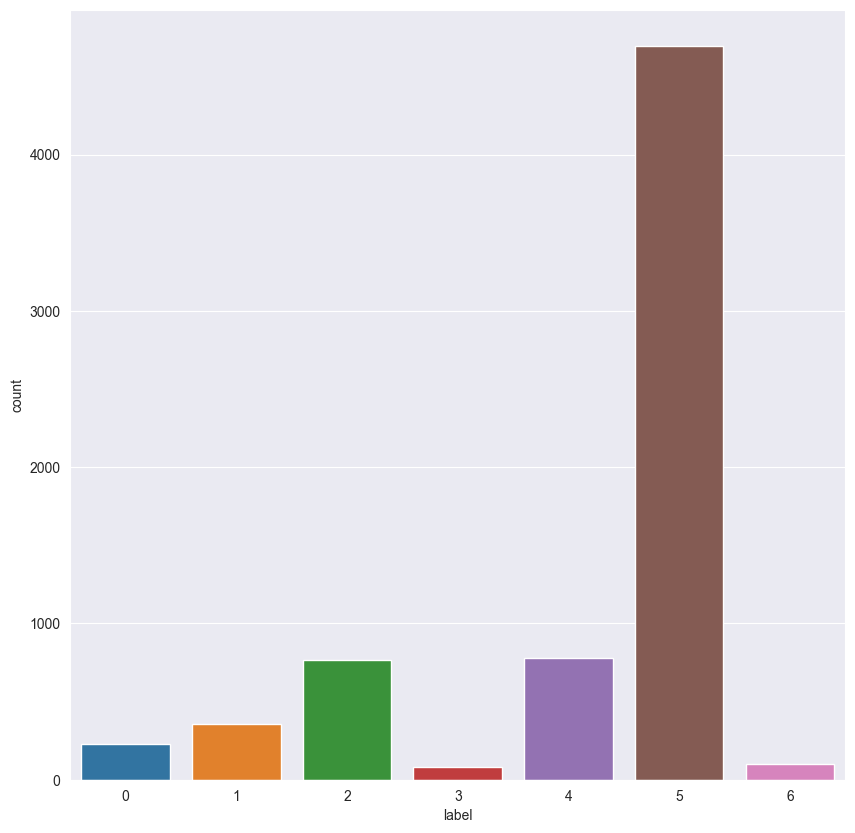

In [26]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label_train)

In [27]:
from imblearn.over_sampling import SMOTE

# Create SMOTE instance
oversample = SMOTE()

# Apply SMOTE to the training data (not test data)
Data_train, Label_train = oversample.fit_resample(Data_train, Label_train)

# Reshape the data if needed
Data_train = np.array(Data_train).reshape(image_shape)

# Print the shape of the data
print('Shape of Data:', Data_train.shape)

Shape of Data: (32851, 28, 28, 3)


/Users/danielhamilton/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

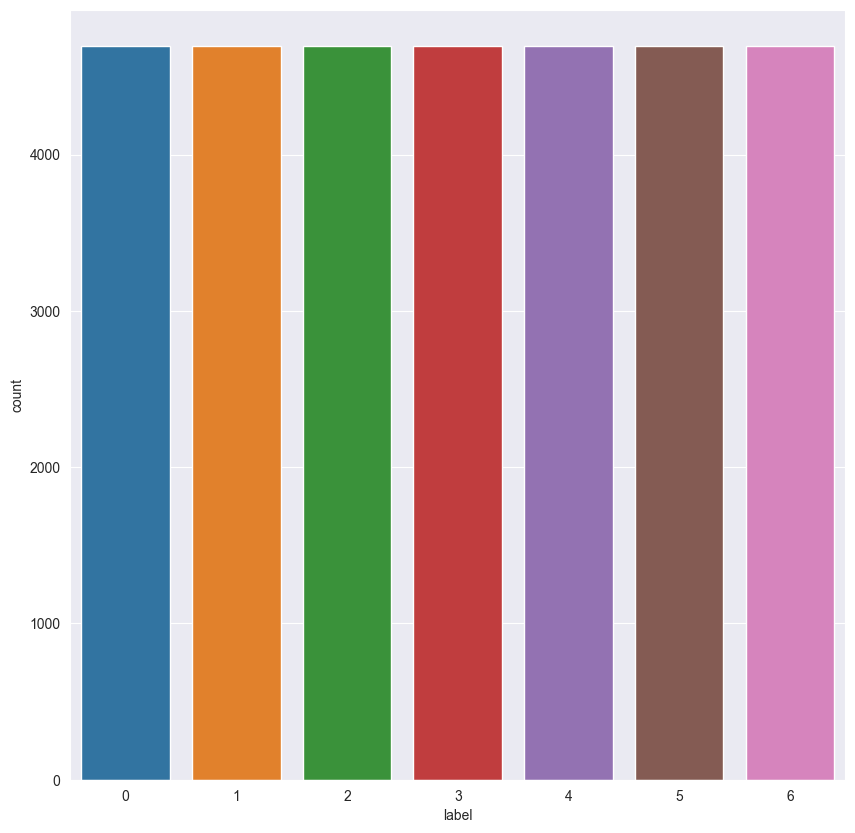

In [28]:
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(Label_train)

In [31]:
Label = np.array(Label_train)
Label

array([0, 0, 0, ..., 6, 6, 6])

In [32]:
classes = {5: ('nv', ' melanocytic nevi'),
           4: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           6: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [34]:
X_train = Data_train
y_train = Label

In [37]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(32851, 28, 28, 3)
(2010, 28, 28, 3)
(998, 28, 28, 3)
(32851,)
(2010,)
(998,)


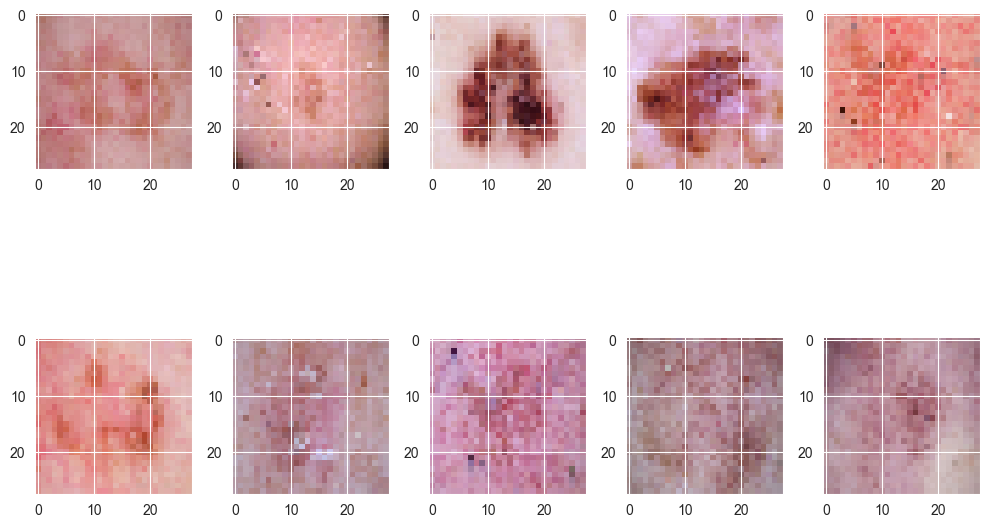

In [38]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

---

# Model creation

---

## ML model

### Import model packages

In [39]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
import tensorflow as tf


In [40]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [41]:
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [43]:
datagen = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)
testgen = ImageDataGenerator(rescale=(1./255))

In [44]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.00001)

### Model

In [45]:
def create_model(num_classes, input_shape=(28,28,3)):
    # Initialize the Sequential model
    model = Sequential()

    # Adding Convolutional Layers
    model.add(Conv2D(32, (3,3), padding='same', activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(Conv2D(256, (3,3), padding='same', activation='relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D())

    # Adding Flatten Layer
    model.add(Flatten())

    # Adding Dense Layers
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())

    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())

    model.add(Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.L1L2()))
    model.add(BatchNormalization())
    
    # Output Layer
    model.add(Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform'))

    # Compiling the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    # Return the compiled model
    return model

In [46]:
create_model(num_classes=7).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0

In [48]:
model = create_model(num_classes=7)

model.fit(X_train ,
          y_train ,
          epochs=35 ,
          batch_size=128,
          validation_data=(X_test , y_test) ,
          callbacks=[learning_rate_reduction])

Epoch 1/35
257/257 [==============================] - 47s 172ms/step - loss: 1.6363 - accuracy: 0.3475 - val_loss: 1.6488 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/35
257/257 [==============================] - 45s 173ms/step - loss: 1.2629 - accuracy: 0.4955 - val_loss: 1.1537 - val_accuracy: 0.6925 - lr: 0.0010
Epoch 3/35
257/257 [==============================] - 47s 182ms/step - loss: 1.0023 - accuracy: 0.6105 - val_loss: 0.9048 - val_accuracy: 0.6572 - lr: 0.0010
Epoch 4/35
257/257 [==============================] - ETA: 0s - loss: 0.7885 - accuracy: 0.6977
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
257/257 [==============================] - 47s 183ms/step - loss: 0.7885 - accuracy: 0.6977 - val_loss: 0.9496 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 5/35
257/257 [==============================] - 46s 179ms/step - loss: 0.5312 - accuracy: 0.8000 - val_loss: 0.8826 - val_accuracy: 0.6960 - lr: 5.0000e-04
Epoch 6/35
257/257 [=========================

-------

## Save model

In [50]:
model.save(f'{file_path}/lesion_classifier_model.h5')

---

## Model Performance

---

## Model learning curve

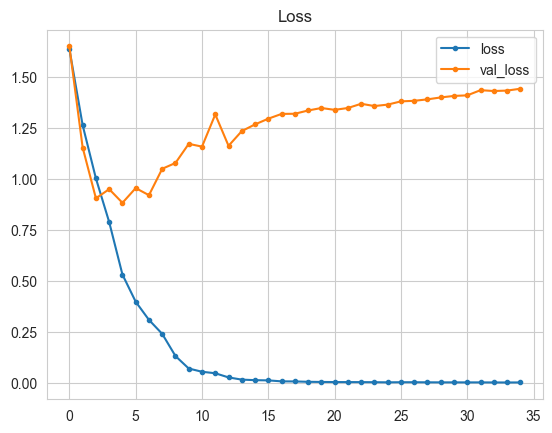

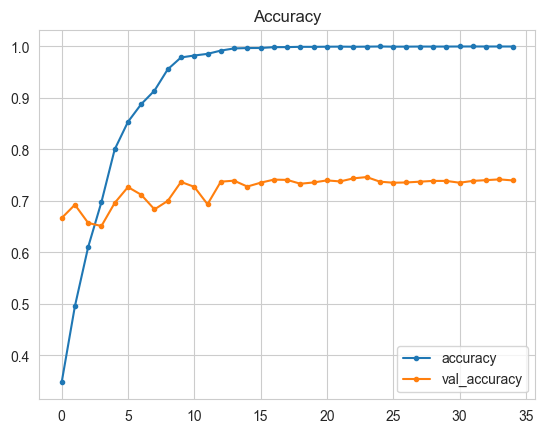

In [51]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Load Model

In [92]:
from keras.models import load_model
model = load_model(f"{file_path}/lesion_classifier_model.h5")

### Evaluate Model

In [119]:
preds = model.predict(X_test)

63/63 [==============================] - 1s 12ms/step


In [120]:
lst = []
for a in preds:
    lst.append(np.argmax(a))

In [121]:
from sklearn.metrics import confusion_matrix

# Convert from multilabel-indicator to multiclass format
y_true_multiclass = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_multiclass, lst)

In [122]:
cm

array([[  20,    9,   17,    1,    7,   13,    0],
       [  10,   41,   12,    3,    8,   28,    2],
       [   9,   16,  106,    1,   28,   61,    0],
       [   0,    4,    3,    4,    2,   11,    0],
       [   2,    4,   30,    0,   92,   95,    0],
       [   4,   12,   45,    0,   73, 1204,    4],
       [   0,    0,    0,    1,    2,    6,   20]])

In [123]:
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming y_test is in multilabel-indicator format and lst is in multiclass format
y_true_multiclass = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_multiclass, lst)

print(f'Accuracy: {accuracy}')

Accuracy: 0.7398009950248756


In [124]:
from sklearn.metrics import classification_report


print(classification_report(y_true_multiclass,lst))

              precision    recall  f1-score   support

           0       0.44      0.30      0.36        67
           1       0.48      0.39      0.43       104
           2       0.50      0.48      0.49       221
           3       0.40      0.17      0.24        24
           4       0.43      0.41      0.42       223
           5       0.85      0.90      0.87      1342
           6       0.77      0.69      0.73        29

    accuracy                           0.74      2010
   macro avg       0.55      0.48      0.51      2010
weighted avg       0.73      0.74      0.73      2010



### Save evaluation pickle

In [125]:
joblib.dump(value=evaluation,
            filename=f"{file_path}/evaluation.pkl")

['outputs/modelling_evaluation_v4/evaluation.pkl']

## Predict on new data

In [126]:
import random
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

from tensorflow.keras.preprocessing import image

pointer = 2
label = train_labels[1]  # select

pil_image = image.load_img(test_path + '/' + label + '/'  + os.listdir(test_path+'/' + label)[pointer], target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
print(f'{label}')
pil_image

Image shape: (28, 28), Image mode: RGB
df


In [127]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 28, 28, 3)


In [128]:
import tensorflow as tf

# Predict probabilities directly
pred_proba = model.predict(my_image)[0]

# Find the index with the maximum probability
pred_class_index = tf.argmax(pred_proba).numpy()

# Map the index to the corresponding class label
pred_class = target_map[pred_class_index]

# Construct text for probabilities
probabilities_text = '\n'.join([f"{target_map[i]}: {p:.2f}" for i, p in enumerate(pred_proba)])

1/1 [==============================] - 0s 19ms/step


In [129]:
print(f'{probabilities_text}')
print({pred_class})

akiec: 0.00
df: 0.00
bkl: 0.00
vasc: 0.00
nv: 0.00
bcc: 1.00
mel: 0.00
{'bcc'}


---

---

NOTE

---